## A. 분류기 평가

- 상황(전처리 후 -> 모델 선정 -> 학습 -> 평가 => 체크)
- 분류기(모델) : 나이브 베이지 ,라쏘회귀, 로지스틱 회귀, 결정 트리, 서포트 벡터 머신, 앙상블 분류기, 랜덤 포레스트, 인공신경망 등등..

1. 성능 평가 기준점
- 원하는 것(결과, 예측) 잘 해결하는지?  
- 원하지 않는 것(빼야 할것, 걸러야 할 것 등)  
> 기준점을 낮추면 -> false positive(거짓 양성) 늘어나게 된다  
    예를 들면 주식 추천 서비스 라면 => 매수 주식 알리게됨  
> 기준점을 높이면(보수적) -> false negative(거짓 음성)이 많아지게 된다. =>  
예를 들면 의료진단 암확인시 오판 할 수 있다.  

2. 분류기의 성능평가 기준
예측값, 실제값   
true ->  실제값 1  
positive -> 예측값 1  

- 참 양성비 (true positive rate) : y 축   -> 바른 예측 
> 실제값이 참인 표본중 정답이라고 분류한 표본의 비율    
- 거짓 양성비 (false positive rate) : x축   -> 잘못된 예측
> 실제값이 거짓인데 정답이라고 분류한 표본의 비율   


3. 분류기의 성능평가 기준 2
> 정밀도(precision)  
> 재현율(recall)   
> 정밀도 재현율을 가지고 계산한 조화 평균(f1 score)  
 

## B. 성능 평가 방법

- 혼동행렬
- ROC 곡선
- AUC 곡선/값
- F1-Score
- List 곡선

### B-1 혼동행렬  
-> 데이터가 범주형(categorical) 변수를 예측하기 위해 사용되는 지도학습법 - 분류  
- 이진 분류(레이블이 2개) => 분류(classification) => 지도학습 =>binary classification  
  binary classification <-> 다중 클래스 분류(multi-classification)  
<-> 회귀(regression) : 연속값을 예측할때, 데이터가 수치형  

- 이진 분류기의 성능을 시각화하여 성능 확인
- 2 x 2 행렬
- 예

|정답|0을 예측한 표본수|  1을 예측한 표본수|
|:--:|:--:|:--:|
|0 | 40 | 5 |
|1 | 1 | 12 |

- 참 양성비 : 12 / (1+12) = 0.92
- 거짓 양성비 : 5 / (40+5) = 0.11

### B-2 ROC 곡선

- 기준점에 따른 분류기의 성능을 시각화 하는 것   
- 거짓 양성비 x축, 참 양성비 y 축  
- 코드로 평가 진행

In [1]:
# 한글 처리 시각화.
import custom as  cus
cus.matplot_hangul()
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import sklearn.datasets

In [3]:
# 아이리스 데이터를 사용하겠다. -> 이진 데이터화 해서 처리
ds = sklearn.datasets.load_iris()
print(ds['data'][:2])
print(ds['feature_names'][:2])
print(ds['target'][:2])
print(ds['target_names'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)']
[0 0]
['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(ds['data'],columns=ds['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# 컬럼명 Species 이름으로 정답이 0이면 setosa, 1이면 versicolor 2면 aus virginica 값이 들어가기
ds['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# 내 쓰레기 코드
# labels = []
# for target in ds['target']:
#     if target == 0:
#         labels.append('setosa')
#     elif target == 1:
#         labels.append('versicolor')
#     else:
#         labels.append('aus virginica')

# df_label = pd.concat([df,pd.Series(labels,name='species')],axis=1)
# df_label.head()


In [7]:
df['species']= [ds['target_names'][n] for n in ds['target']]

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 4개 분류기 사용하여 ROC 곡선을 시각화하여 어느 분류기가 성능이 좋은지 평가

In [9]:
import sklearn
# metrics 성능평가에 사용하는 도구들이 들어있음.
from sklearn.metrics import roc_curve
# 학습 데이터와 테스트 데이터를 분류 함수
#from sklearn.cross_validation 
# 0.20.0 version
from sklearn.model_selection import train_test_split
# 분류기, 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
# 결정 트리 분류
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트 분류
from sklearn.ensemble import RandomForestClassifier
# 나이브베이즈 가우시안
from sklearn.naive_bayes import GaussianNB

In [10]:
# 분류기를 모은 dictionary
CLASS_DICT = {
    # 키(분류기의 이름) : (시각화 선의 모양, 분류기 객체 )
    '로지스틱회귀':('-', LogisticRegression()),
    '결정트리분류':('--', DecisionTreeClassifier(max_depth=5) ),
    '랜덤포레스트':('.-', RandomForestClassifier(max_depth=5, n_estimators = 10, max_features=1 )),
    '나이브베이즈':(':', GaussianNB() )        
}

In [11]:
df.head()
X = df.iloc[:,:4]
Y = df.iloc[:,4]


In [12]:
# 이진화 작업이 필요하다. roc_curve is not support multiple classification 
#Y = [label =='versicolor' for label in Y]
Y = [label =='virginica' for label in Y]

In [13]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y)

In [14]:
# for label,pack in CLASS_DICT.items():
#     ####목표 roc 커브 그리기
    
#     line_shape = pack[0]
#     model = pack[1]
    
#     model.fit(X_train,Y_train)
#     pre = model.predict(X_test) #  1
#     # 확률을 계산한 이유는 roc를 계산하기 위해서 일 것이다.
    
#     fpr, tpr, thresholds = roc_curve( Y_test, pre )# it's error. roc_curve does not support multiple classification    
    
#     aucScore = auc(fpr, tpr)
#     labels = '분류기:%s auc=%r' % (label,aucScore)  
#     plt.plot(fpr, tpr, line_shape, linewidth=5, label=labels)#label=a[0]  
#     plt.legend()
   
# #     print(a)
# #     clf = a[2]
# #     pre = 
# #     fpr, tpr, thresholds = roc_curve( Y_test, pre )
# #     plt.plot(fpr, tpr, lineShape, linewidth=5, label=labels)#label=a[0]    

In [26]:
Y_test

58      True
120    False
30     False
60      True
53      True
3      False
140    False
129    False
35     False
36     False
73      True
138    False
54      True
9      False
89      True
39     False
20     False
119    False
47     False
132    False
97      True
121    False
71      True
116    False
37     False
78      True
80      True
90      True
61      True
83      True
       ...  
94      True
142    False
38     False
26     False
145    False
96      True
105    False
95      True
28     False
82      True
114    False
64      True
101    False
81      True
88      True
10     False
5      False
66      True
29     False
62      True
7      False
118    False
33     False
110    False
144    False
133    False
25     False
16     False
6      False
77      True
Name: species, Length: 120, dtype: bool

In [15]:
# 데이터 이진화
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [16]:
X = df[ df.columns[:4] ]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
Y = df['species'] == 'versicolor'  # Series
Y[:2]

0    False
1    False
Name: species, dtype: bool

In [18]:
len(X), Y.unique()

(150, array([False,  True]))

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.8 )

In [20]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape,type(Y_test))

(30, 4) (120, 4) (30,) (120,) <class 'pandas.core.series.Series'>


In [21]:
# 4ㄱ ㅐ분류기 학습 및 시각화
for model in CLASS_DICT:
    print(model)#키만 나옴

로지스틱회귀
결정트리분류
랜덤포레스트
나이브베이즈


로지스틱회귀 ('-', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
0      0.398580
1      0.306272
2      0.231097
3      0.460837
4      0.421640
5      0.218485
6      0.298342
7      0.448629
8      0.208053
9      0.190710
10     0.407891
11     0.302027
12     0.389355
13     0.239898
14     0.381162
15     0.196589
16     0.216377
17     0.508552
18     0.200474
19     0.360057
20     0.358774
21     0.301691
22     0.355734
23     0.366724
24     0.239898
25     0.336602
26     0.413286
27     0.396213
28     0.297279
29     0.398386
         ...   
90     0.358886
91     0.352390
92     0.216336
93     0.181511
94     0.305859
95     0.326326
96     0.459652
97     0.318725
98     0.196493
99     0.364369
100    0.280831
101    0.289877
102    0.352390
103    0.419353
1

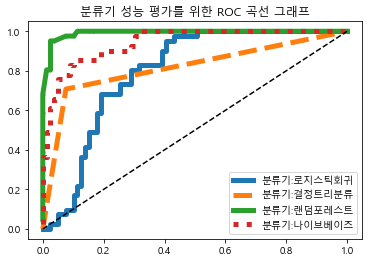

In [22]:
#plt.figure(figsize=(16,16))
#4개 분류기 학습 및 평가 및 시각화
for mName,(lineShape, clf) in CLASS_DICT.items():    
    print(mName,(lineShape, clf))
    # 학습
    clf.fit(X_train,Y_train)
    # 1) 예측값으로 예측 결과 : predict()
    # 2) 예측에 대한 확률 : predict_proba() 
    # -> 알고리즘의 신뢰수준을 확인
    pre = clf.predict_proba(X_test)   
    # 답안 획득    
  
    pre = pd.Series(pre[:,1])    
    print(pre)
    # ROC 계산
    # roc_curve : 
    #fpr : 거짓 양성비
    #tpr : 참 양성비
    #thresholds : fpr, tpr을 계산할때 사용한 임계값(?) - 의미도 이해가 안가고 왜 받았는지도 이해 못함.
    fpr, tpr, thresholds = roc_curve( Y_test, pre )
    labels = '분류기:%s' % mName
    # 시각화
    print('thresholds:',thresholds)
    plt.plot(fpr, tpr, lineShape, linewidth=5, label=labels)
plt.legend()
plt.title('분류기 성능 평가를 위한 ROC 곡선 그래프')
# 경계 구분선
plt.plot([0,1],[0,1], 'k--')# 대각선 점선
plt.show()

**해석**
- 좌측 하단 : 탐지를 못한다.
- 좌측 상단 :완벽한 분류기 
- 우측 상단 : 모든 값을 양성으로 분류

### 결론
- 품종이 versicolor인 경우 random forest classifier 가 성능이 좋았다.
- 시각적으로 판단한 것은 ROC 곡선, 만약 곡선들이 접전을 벌인다면 해석이 힘들다
- 이런 경우 ROC 곡선을 요약하는 수치값이 필요하다. 
- ROC 곡선의 하단 면적을 계산하는 방법 =>AUC( area under curve)

### B-3 AUC

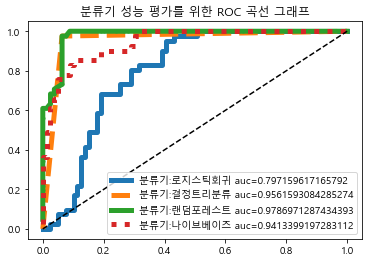

In [23]:
from sklearn.metrics import auc 
# 벌써부터 근육 걱정 하는 사람이랑 다를 바가 없다.
for mName,(lineShape, clf) in CLASS_DICT.items(): 
    clf.fit(X_train,Y_train)  
    pred = clf.predict_proba(X_test)
    pre = pd.Series(pred[:,1]) 
    fpr, tpr, thresholds = roc_curve( Y_test, pre )
    #auc 값 계산
    aucScore = auc(fpr, tpr)
    label = '분류기:%s auc=%r' % (mName,aucScore)    
    plt.plot(fpr, tpr, lineShape, linewidth=5, label=label)
plt.legend()
plt.title('분류기 성능 평가를 위한 ROC 곡선 그래프')

plt.plot([0,1],[0,1], 'k--')# 대각선 점선
plt.show()

### 분류 기준 값
- ROC 곡선의 분류 기준값  
Y = 1-X와 만나는점
> ROC 곡선의 분류 기준값
> 참, 거짓의 표본의 정확도가 동일해지는 지점 

or 

- y = x 와 평행이 되는지점  
> 변곡점

### B-4 F1-score

- 이진 분류기는 통상 f1-score로 평가함
- 정밀도, 재현율의 조화 평균
- 정밀도(precision) : 분류기가 양성으로 판단한 표보늘 중에 실제 양성 비율 
- 재현율(recall) :  분류기가 실제로 양성으로 판단한 표본의 비율 
- 조화평균 식 :
    >F1 = 1/(1/정밀도 + 1/재현율)/2 = 2 * 정밀도 * 재현율 / 정밀도 * 재현율
    
    >값의 범위는 0~1사이 값을 가진다.


[ 보충 설명 ]
- 정확도 : Accuracy
- 정밀도 : Precision
- 재현율 : Recall
- F1 Score : 정밀도와 재현율의 조화 평균

[ 해석 ]
- 정확도 : 예측이 정답과 얼마나 정확한가?
- 정밀도 : 예측한 것중에 정답의 비율은?
- 재현율 : 찾아야 할 것중에 실제로 찾은 비율은?
- F1 Score : 정밀도와 재현율의 평균
>  이중에서 F1 Score 값이 높으면 성능이 높다

### B-5 다중 클래스 분류의 평균 f1-score 

- 마이크로 평균
- 매크로 평균

In [24]:
from sklearn.metrics import f1_score
y_data = [0, 1, 2, 0, 1, 2 ]
y_pre  = [0, 2, 1, 0, 0, 1 ]
# 매크로 평균
# 정밀도 = 참의 개별값의 합산 / 참의 개별값의 합산 + 거짓의 개별값의 합산
print(f1_score(y_data, y_pre, average='macro'))
# 마이크로 평균
# 정밀도 = (정밀도1+ 정밀도2+ 정밀도3+ ....) n개 클래스분류갯수
print(f1_score(y_data, y_pre, average='micro'))
# 가중치 변경
print(f1_score(y_data, y_pre, average='weighted'))
print(f1_score(y_data, y_pre, average=None))

0.26666666666666666
0.3333333333333333
0.26666666666666666
[0.8 0.  0. ]
